# Investigation on Student assessment Data

## Investigation Overview

In this investigation, We wanted to see what variables can effect students assessment score positivaly or negativaly. the results of this invistgation aim to improve the learning process by understanding what factors can contribute in achieving better scores in class assessment. 

## Dataset Overview

The data in this experiement called PISA which stands for Programmee for International Student Assessment. PISA is a survey of students' skills and knowledge along with other features. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. 

Original dataset contains 510,000 students with 635 features. The dataset was modified to include only 50 features to simplfiy the exploration task in this project. 

In [73]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

Loading the Dataset

In [4]:
df =pd.read_csv('pisa2012_modified.csv')

### This dataset contains 222626 entries with 50 features. The original dataset feature names has been modified to be represented in easier form. for example gender column in the original dataset is called ST04Q01. we modified most of the columns different names that can best represent the data in that column. For more information about each feature discription, please refer to the documnetation in the readme file through this link. 

### There is no duplicated data in this dataset

### *Question1: Does Being late to classes affect the student perofrmance on assessment?*

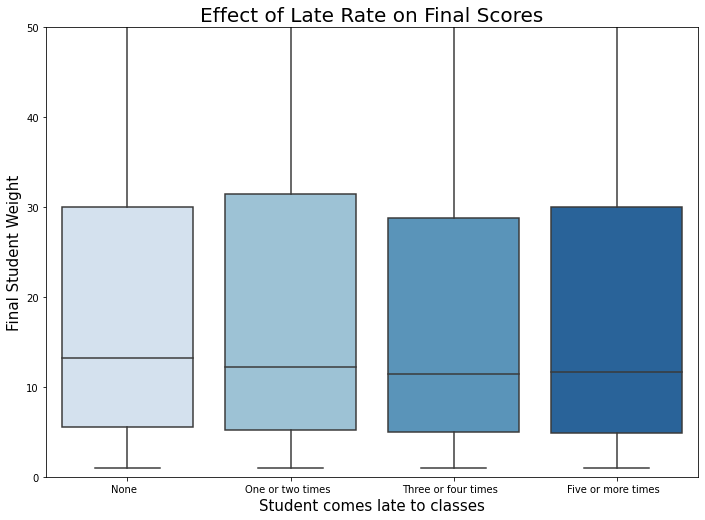

In [64]:
sb.boxplot(data = df, x ='Late', y = 'W_FSTUWT', palette="Blues");

plt.gcf().set_size_inches(11.69, 8.27)

plt.title("Effect of Late Rate on Final Scores", fontsize=20);
plt.xlabel('Student comes late to classes', fontsize=15)
plt.ylabel('Final Student Weight', fontsize=15)

plt.ylim((0,50));

### **We can observe from the figure that the student that have never came late has scored better on average. Even if the student comes late one or two times, their average score is still better than those who have higher late rate. Notably, the students who came late one or two times have higher third quartile range than the others.**

----------------------------------------

### *Question2: what is the effect of having more out of school study hours on student performance?*

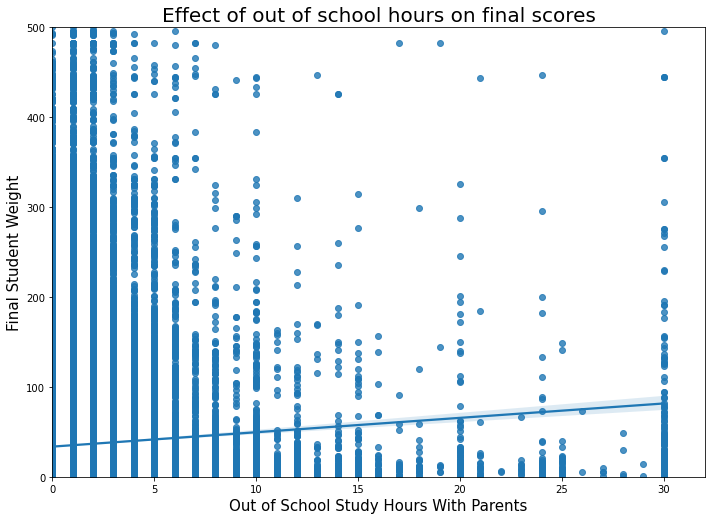

In [65]:
sb.regplot(data = df, x = 'OSST_Parents', y = 'W_FSTUWT');

plt.title("Effect of out of school hours on final scores", fontsize=20);
plt.xlabel('Out of School Study Hours With Parents',fontsize=15)
plt.ylabel('Final Student Weight',fontsize=15)

plt.gcf().set_size_inches(11.69, 8.27)

plt.ylim((0,500));

plt.xlim((0,32));

### **At first glance, we can say that there is a negative relationship between hours of study at home with parents and the final student weight, but there is an exception at 30 hours per week where student weight have increased sharply.**

### **This implies that 30 hours out of school study hours with parent can help student improve their performance.** 

-------------------------------------------------------------------------------------

### *Question3: What is the effect of mother job state on student performance?*

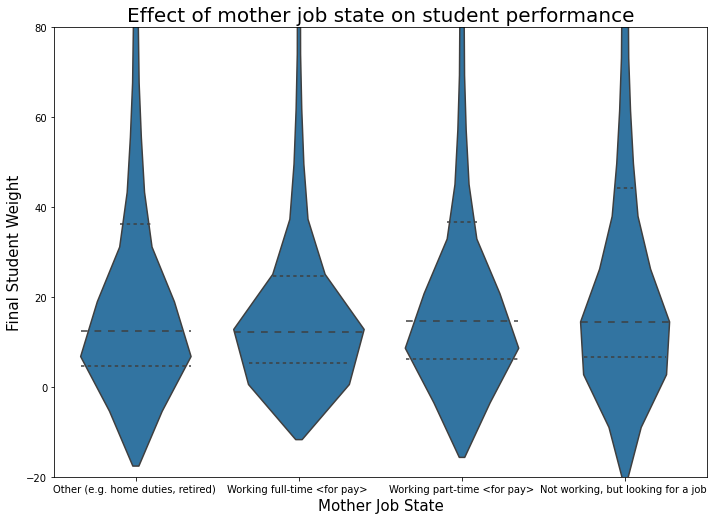

In [68]:
base_color = sb.color_palette()[0]

plt.figure(figsize=[ 11.69, 8.27])
#plotting
sb.violinplot(data = df, x ='Mother_Job_State', y = 'W_FSTUWT', color=base_color, inner='quartile');

#Adding labels
plt.title("Effect of mother job state on student performance", fontsize=20);
plt.xlabel('Mother Job State', fontsize=15)
plt.ylabel('Final Student Weight', fontsize=15)

#cutting outliers range
plt.ylim((-20,80));


### **From the above figure, we can see that students that have stay at home mothers or with part time job score better on average than student that have mothers working full time job or other reasons.**

**our intuition of the reason of getting this results is that stay at home and part-time mothers might have more time at home to teach their kids and follow up with what they have learnt in schools.**

--------------------------------------

### *Question4: Does having lower math anxiety level and joining math clubs improve student performance?*

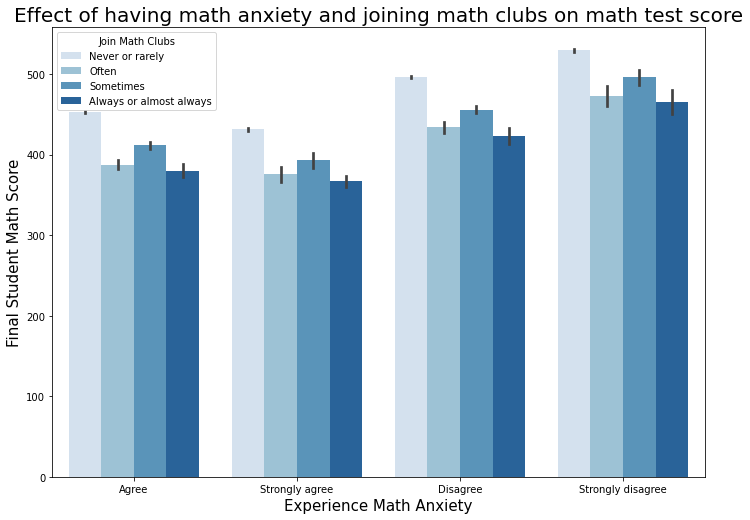

In [78]:
sb.barplot(data = df, x = 'Math_Anxiety', y='PV1MATH', hue = 'Join_math_club', palette="Blues");

#changing plot size
plt.gcf().set_size_inches(11.69, 8.27)

plt.legend(title='Join Math Clubs')
plt.title("Effect of having math anxiety and joining math clubs on math test score", fontsize=20);
plt.xlabel('Experience Math Anxiety', fontsize=15)
plt.ylabel('Final Student Math Score', fontsize=15)

plt.show()

### **Surprisingly, we can see that students with higher math anxity scores better at math test than those who don't even with they attend math clubs. Students who never or often join math club and don't have math Anxiety performed the worst among others.** 

------------------------------------------------------

### *Question5: What is the effect of having more classes per week on final scores and math score?*

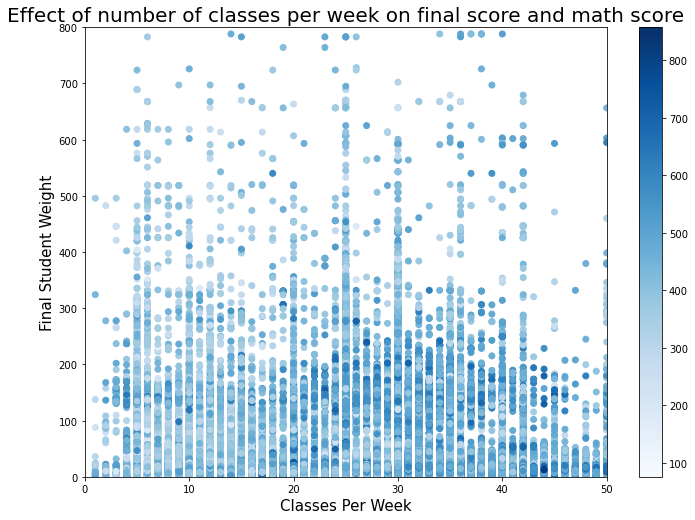

In [75]:
cm = plt.cm.get_cmap('Blues') #BuPu

plt.scatter(data = df, x ='Classes_per_week', y='W_FSTUWT', c = 'PV1MATH', cmap=cm);
plt.colorbar()

plt.gcf().set_size_inches(11.69, 8.27)

plt.title("Effect of number of classes per week on final score and math score", fontsize=20);
plt.xlabel('Classes Per Week', fontsize=15)
plt.ylabel('Final Student Weight', fontsize=15)

plt.xlim((0,50));
plt.ylim((0,800));

### **In the above figure, math assesment results is represented by the color bar. Darker points indicate higher results in math assessment while light ones indicate low scores. We can see from the figure that higher number of classes per week has resulted in better math results even though the average final student scores falls at the same level as other students with lower classes per week**

---------------------------------------

### *Question6: What is the effect of encouraging student thinking and reasoning while owning the required text books on student performance?*

In [21]:
df['T_strategy1'].value_counts()

Most Lessons            53437
Every Lesson            50246
Some Lessons            30152
Never or Hardly Ever     9525
Name: T_strategy1, dtype: int64

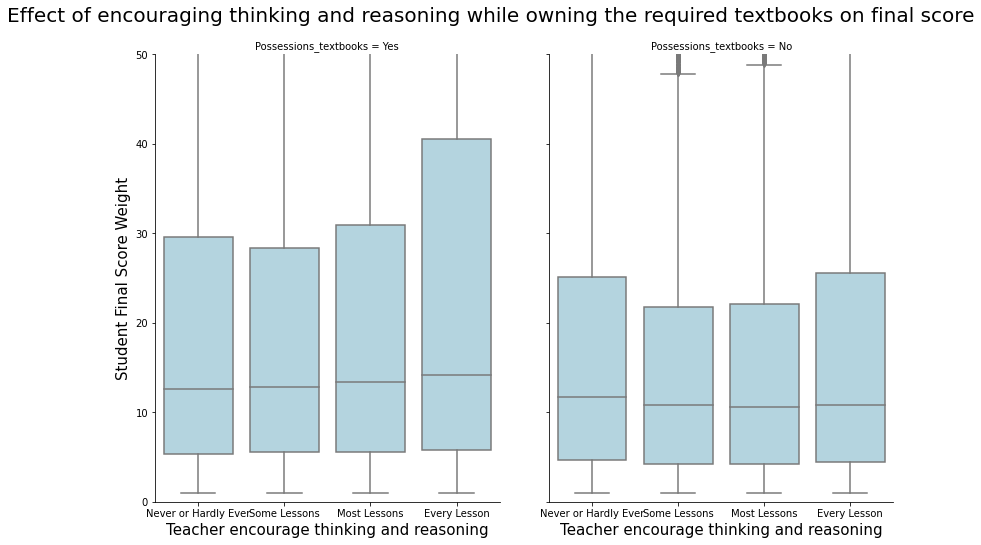

In [76]:
order_b =['Never or Hardly Ever','Some Lessons', 'Most Lessons', 'Every Lesson']

g = sb.FacetGrid(data = df, col = 'Possessions_textbooks', height = 4, sharey=True)

g.map(sb.boxplot, 'T_strategy2', 'W_FSTUWT', order = order_b, color='lightblue');

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Effect of encouraging thinking and reasoning while owning the required textbooks on final score", fontsize=20) # can also get the figure from plt.gcf()

#changing the labels of x-axis
g.axes[0,0].set_xlabel('Teacher encourage thinking and reasoning', fontsize=15)
g.axes[0,1].set_xlabel('Teacher encourage thinking and reasoning', fontsize=15)


g.axes[0,0].set_ylabel('Student Final Score Weight', fontsize=15)
        
plt.gcf().set_size_inches(11.69, 8.27)

plt.ylim((0,50));

 ### **We can see from the figure that in case teachers encouraged thinking and reasoning while student owns the required text books, the student achieved better scores on average.**
 
**Thus, we encourage helping the student by providing them with the required text books and train teachers to encourage student thinking and reasoning.** 

# Summary

#### In this experiment, we investigated the factors that can contribute in better school achievements. From the results we can say that mother state affect student scores since that student who have stay at home mothers achieved better on average than the others. Secondly, we investigated the relationship between the teaching strategy and owning textbooks on student performance. The results show that teacher who encourage student’s creativity and at the same time the student own the required textbooks achieve better than the others on average. Furthermore, we checked between the number of classes per week and student performance on final scores and in math tests. Even though having more classes per weeks didn't seem to affect final score but it appears to affect positively their math score. 